#第十六週上課內容

###GitHub 教材參考資料

[在程式執行期間取得記憶體](https://github.com/htchen/i2p-nthu/tree/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/Supplementary%20Material%201#%E5%9C%A8%E7%A8%8B%E5%BC%8F%E5%9F%B7%E8%A1%8C%E6%9C%9F%E9%96%93%E5%8F%96%E5%BE%97%E8%A8%98%E6%86%B6%E9%AB%94)


[在程式執行期間取得記憶體練習](https://github.com/htchen/i2p-nthu/tree/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/Supplementary%20Material%201#%E5%9C%A8%E7%A8%8B%E5%BC%8F%E5%9F%B7%E8%A1%8C%E6%9C%9F%E9%96%93%E5%8F%96%E5%BE%97%E8%A8%98%E6%86%B6%E9%AB%94-01)

[C Structures](https://github.com/htchen/i2p-nthu/tree/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/Supplementary%20Material%202#c-structures)


# Example 1

## 在程式執行期間取得記憶體
[C reference 對於 malloc 的說明](http://en.cppreference.com/w/c/memory/malloc)  
[C reference 對於 free 的說明](http://en.cppreference.com/w/c/memory/free)  

有的時候，我們需要在執行的時候動態分配記憶體  
此時可以使用`malloc`跟`free`進行記憶體的分配與釋放  

`void* malloc( size_t size )`  
*   *size*  
    要分配的記憶體大小，以 byte 為單位  
*   *回傳值*  
    如果成功的話，回傳的指標是指向分配的的記憶體的開頭位址  
    如果失敗的話，回傳一個空指標 NULL

`void free( void* ptr )`  
*   *ptr*  
    要釋放的記憶體的指標，必須是當初分配某塊空間時拿到的那個位址；如果`ptr`為`NULL`，則此函式不會做任何事情  
    譬如呼叫`malloc(16);`以後拿到的位址是`0x8BADF00D`，之後若想要將這塊塊記憶體回收  
    在呼叫`free`時必須傳入`0x8BADF00D`，不能是`0x8BADF00F`或其他不是由相關記憶體分配函式所回傳的位址  

> Note:  
> `void*`的意思是指向不特定的型別，通常用來記錄某個實體是位在記憶體的哪裡  
> 所以針對`void*`是不能進行運算及間接引用  
> 在轉型時要特別注意，通常是建議如果將`T*`轉為`void*`，最後要間接引用時，應轉回`T*`而非其他型別  
> `int*`->`void*`->`int*`會得到與原本相同的位址，最後間接取值時會正確  
> `int*`->`void*`->`float*`不一定會得到與原本相同的位址，最後間接取值時的結果也不一定會正確  
> [Stack Overflow 關於指標轉換的問答](https://stackoverflow.com/questions/4810417/c-when-is-casting-between-pointer-types-not-undefined-behavior)  
> [Stack Overflow 關於 void* 轉換的問答](https://stackoverflow.com/questions/20469958/c-when-is-casting-void-pointer-needed) 
 


In [29]:
%%writefile E16_01.c

# include <stdio.h>
# include <stdlib.h>
int main(void)
{
   double * ptd;
   int array_size, i;
 
   printf("How many doubles do you want? ");
   scanf("%d", &array_size);
   ptd = (double *) malloc(array_size * sizeof (double));
   if (ptd == NULL) {
      printf("Memory allocation failed.\n");
      exit(EXIT_FAILURE);
   }

   for (i = 0; i < array_size; i++) {
      ptd[i] = (double) rand() / RAND_MAX;
   }
   
   for (i = 0; i < array_size; i++) {
      if (ptd[i] > 0.5)
         printf("%d: %f\n", i, ptd[i]);
   }

   free(ptd);

   return 0;
}

Overwriting E16_01.c


In [31]:
%%shell
gcc E16_01.c -o E16_01 -Wall
./E16_01

How many doubles do you want? 100
0: 0.840188
2: 0.783099
3: 0.798440
4: 0.911647
7: 0.768230
9: 0.553970
11: 0.628871
13: 0.513401
14: 0.952230
15: 0.916195
16: 0.635712
17: 0.717297
19: 0.606969
23: 0.804177
28: 0.998925
30: 0.512932
31: 0.839112
32: 0.612640
34: 0.637552
35: 0.524287
37: 0.972775
39: 0.771358
40: 0.526745
41: 0.769914
43: 0.891529
46: 0.807725
47: 0.919026
49: 0.949327
50: 0.525995
53: 0.663227
54: 0.890233
61: 0.970634
62: 0.902208
63: 0.850920
65: 0.539760
67: 0.760249
68: 0.512535
69: 0.667724
70: 0.531606
73: 0.931835
74: 0.930810
75: 0.720952
77: 0.738534
78: 0.639979
80: 0.687861
83: 0.880075
84: 0.829201
87: 0.893372
89: 0.686670
90: 0.956468
91: 0.588640
92: 0.657304
93: 0.858676
95: 0.923970
97: 0.814767
98: 0.684219
99: 0.910972


# Example 2

## 動態產生二維陣列

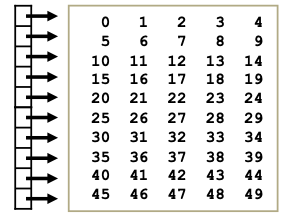

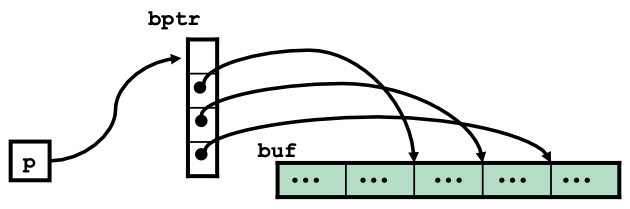

In [57]:
%%writefile test.c
#include <stdio.h>
#include <stdlib.h> // malloc, rand

int main(void)
{
    int** a;  // a[0], a[1], ..., a[9]
    int * array;
    int row, col;
    int i, j;
    scanf("%d%d", &row, &col);
  
    /*
    row = 5
    col = 3
    row*col = 15
     0  1  2   3  4  5  6  7  8  9  10 11   12 13 14
    |1  2  3  |4  5  6 |7  8  9 |10 11 12 | 13 14 15|
    */
 
    array = (int*) malloc(row*col*sizeof(int));
    a = (int**) malloc(row*sizeof(int*));
    for (i=0; i<row; ++i) {
      a[i] = &array[i*col];
    }
 
    for (i=0; i<row; ++i) {
        for (j=0; j<col; ++j) {
            a[i][j] = i*col + (j+1);
        }
    }

    for (i=0; i<row; ++i) {
        printf("a[%d]: %p a[%d][0]=%d, a[%d][1]=%d, a[%d][2]=%d %p\n", 
               i, a[i], i, a[i][0], i, a[i][1], i, a[i][2], &a[i][2]);
    }
 
    free(a);
    free(array);
    
    return 0;
}

Overwriting test.c


In [58]:
%%shell
gcc test.c -o test
./test

5 3
a[0]: 0x5572c7b8e000 a[0][0]=1, a[0][1]=2, a[0][2]=3 0x5572c7b8e008
a[1]: 0x5572c7b8e00c a[1][0]=4, a[1][1]=5, a[1][2]=6 0x5572c7b8e014
a[2]: 0x5572c7b8e018 a[2][0]=7, a[2][1]=8, a[2][2]=9 0x5572c7b8e020
a[3]: 0x5572c7b8e024 a[3][0]=10, a[3][1]=11, a[3][2]=12 0x5572c7b8e02c
a[4]: 0x5572c7b8e030 a[4][0]=13, a[4][1]=14, a[4][2]=15 0x5572c7b8e038


In [5]:
%%writefile E16_02.c
#include <stdio.h>
#include <stdlib.h>
int main(void)
{
   int *a, **b, i, j, rows, cols;
   
   scanf("%d %d", &rows, &cols);
   a = (int *) malloc(rows * cols * sizeof(int));
   for (i = 0; i < rows*cols; i++) a[i] = i;
   b = (int* *) malloc(rows * sizeof(int *));

   for (i = 0 ; i < rows; i++) b[i] = &a[i*cols];


   for (i = 0; i < rows; i++) {
      for (j = 0; j < cols; j++) {
         printf("%3d ", b[i][j]); 
      }
      printf("\n");
   }
   
   free(b);
   free(a);

   return 0;
}

Overwriting E16_02.c


In [7]:
%%shell
gcc E16_02.c -o E16_02
./E16_02

3 5
  0   1   2   3   4 
  5   6   7   8   9 
 10  11  12  13  14 



## 關於動態分配記憶體時，可能會犯的一些錯誤：  
*   memory leak  
    ```C
    int* a = malloc(sizeof(int));
    *a = 123;
    a = malloc(sizeof(int));
    *a = 456;
    free(a);
    ```  
    以上例來說，第一次分配到的記憶體就這樣被丟失，沒有被回收，之後也沒有任何方法能夠回收到那塊記憶體  
    類似這種狀況，當有記憶體是沒辦法被回收的，就被稱為 memory leak  

*   dangling pointer  
    ```C
    int* ptr = NULL;
    {
        int a = 0;
        ptr = &a;
    }
    // ptr is a dangling pointer now !

    int* f()
    {
      int x;
      x  = 5;
      return &x;
    }

    ptr = f();
    ```  

    以上例來說，`int a`的生命週期只在那對大括弧內，一旦過了那個大括弧的範圍，`ptr`所指向的位址就是不合法的  
    類似這種狀況，當有指標指向的記憶體是已經無效的，該指標就被稱為 dangling pointer  
    ```C
    int* a = malloc(sizeof(int));
    int* b = a;
    *a = 123;
    
    free(a);
    a = NULL;
    
    // b is a dangling pointer now !

    ```  
    > Note:  
    > 對大多數`malloc`和`free`的 implementation 來說，所謂取得和釋放其實只是改變記憶體的使用狀態  
    > `malloc`和`free`做的事情只是去記錄哪些記憶體區塊被佔用以及哪些可用  
    > 所以呼叫`free(a)`之後，乍看之下可能會覺得沒發生什麼變化，因為原先那些記憶體內的資料可能都還存在  
    > 但是無論如何程式都不該再去存取已經被釋放的記憶體內容  



# Example 3

## 字元陣列和字串
[C reference 對於 string literal in C 的說明](http://en.cppreference.com/w/c/language/string_literal)  
[C++ reference 對於 string literal in C++ 的說明](http://en.cppreference.com/w/cpp/language/string_literal)  
[Stack Overflow 關於 string literal 在 C 與 C++ 中的說明](https://stackoverflow.com/questions/2245664/what-is-the-type-of-string-literals-in-c-and-c)  

字元陣列其實就是一個陣列，其元素為字元  
而字串則是一個字元陣列，且其結尾必須是`'\0'`  
通常在傳遞字串時，會用指向字串的第一個字元的指標作為該字串的代表  

關於 string literal，有幾個需要注意的地方：  
1.  string literal 的型別是 `char[]`  
2.  如果是用指標去指向某個 string literal，那麼其指向的內容是不可寫的  
    ```C
    char* str = "Test"; // OK
    str[0] = 't'; // 未定義行為，但可以通過編譯，可能在執行時出錯
    ```
3.  為了避免類似錯誤發生，通常會建議用：  
    *   ```C
        const char* str = "string"; // 如果寫出 str[0]='t'，在編譯時就會出錯
        ```
    *   ```C
        char str[] = "string"; // str[0]='S' 是可以的
        ```

```C
const char* str = "string";
```
*   `"string"`會在程式被載入的時候，一起被載入到某塊記憶體 (常見的狀況是載入到 data segment)  
*   而`str`指向的位址就是`"string"`被儲存到的記憶體的開頭位址  
*   標準規定對於 string literal 的寫入是未定義行為，實際上也有實作是將`"string"`載入到一塊只允許讀取的記憶體  

```C
char str[] = "string";
```  
*   其實該句等同`char str[7] = "string"`，也等同於`char str[7] = {'s', 't', 'r', 'i', 'n', 'g', '\0'};`  
*   相當於把記憶體中`"string"`複製一份當作`str`這個陣列的初始值  
*   所以`str[0] = 'S';`就合法了  

試著執行看看下列的程式碼，並了解`str1`與`str2`之間的差別，以及輸出是否如同預期

In [75]:
%%writefile E16_03.c

#include <stdio.h>

int main(void)
{
    char*  str1[] = {"piece", "of", "cake"};


    char str2[] [8] = {"piece", "of", "cake"};
 
    int i, j;

    for (i=0; i<3; i++) {
        for (j=0; j<8; j++)
            printf("(%c, %d) ", str1[i][j], str1[i][j]);
        printf("\n");
    }

    for (i=0; i<3; i++) {
        for (j=0; j<8; j++)
            printf("%c", str2[i][j]);
        printf("\n");
    }

    return 0; 
}


Overwriting E16_03.c


In [76]:
%%shell
gcc E16_03.c -o E16_03
./E16_03

(p, 112) (i, 105) (e, 101) (c, 99) (e, 101) ( , 0) (o, 111) (f, 102) 
(o, 111) (f, 102) ( , 0) (c, 99) (a, 97) (k, 107) (e, 101) ( , 0) 
(c, 99) (a, 97) (k, 107) (e, 101) ( , 0) ((, 40) (%, 37) (c, 99) 
piece   
of      
cake    



## 雙重指標

相當於指標的指標  
如果想要透過一個函式更改外面的`int`變數，會有類似底下的寫法  

```C
void swap(int* a, int* b)
{
    int temp = *a;
    *a = *b;
    *b = temp;
}

...

int x = 5, y = 3;
swap(&x, &y);
```  

那如果想要透過一個函式更改外面的`int*`變數呢？  
觀察上面的程式，會發現如果要透過函式更改外面的變數，其型別為`T`  
那麼在函式的參數，會期待收到一個`T*`的引數，藉此可以透過間接引用的方式改到外面的變數  

下例則是表達如果希望藉由函式改變外面的`ptr`，其型別為`float*`  
在這裡可以將`float*`理解成`T`，按照上面的推論，那麼必須要傳入型別為`float**`的引數，也就是`&ptr`  
才可以在函式裡面藉由`*p`更改`ptr`所指向的位址  

In [79]:
%%writefile E16_04.c
#include <stdio.h>
#include <stdlib.h>

float* malloc_float1(size_t sz)
{
   return (float *) malloc(sz*sizeof(float));
}


void malloc_float2( float* * q , size_t sz)  // q = &ptr
{
    *q = (float *) malloc(sz*sizeof(float));  // *q => *&ptr => ptr
}

int main(void)
{
    float * ptr = NULL;
    int i;
    int n = 100;

    malloc_float2(&ptr, n);

    for (i=0; i<n; i++)
        ptr[i] = (float) rand()/RAND_MAX;

    for (i=0; i<n; i++)
      printf("%f\n", ptr[i]);
    
    free(ptr);

    return 0;
}

Overwriting E16_04.c


In [ ]:
%%shell
gcc E16_04.c -o E16_04
./E16_04

# 練習題

## 字元陣列和字串-01

說明並圖示下面兩種寫法的差異  

```C
char str1[] = "piece of cake";
char *str2 = "piece of cake"; /* 附註：ANSI C 要求 compiler 可以支援到長度 509 的字串`
```

## 字元陣列和字串-02

假設在`main`裡面有下列三行，請問`str1`、`str2`、`str3`的內容會是什麼？  

```C
char str1[100];
char str2[100] = {'a'}; 
char str3[100] = "";
```

## 字元陣列和字串-03

寫一個 function，傳入一個字串，判斷是否為 palindrome (像是`level`、`wasitacatisaw`)  

## 字元陣列和字串-04

用圖示表現出下面的字串  

```C
char *ptrary[] = {"piece", "of", "cake"};
```

## 字元陣列和字串-05

圖示下面兩種寫法的差別  

```C
char *str1[] = {"piece", "of", "cake"};
char str2[][8] = {"piece", "of", "cake"};
```

## C Structures
[The GNU C Programming Tutorial 對於 structures 的解釋](https://www.gnu.org/software/gnu-c-manual/gnu-c-manual.html#Structures)  

Structures 是可以由使用者自己定義，由其他型別 (甚至是 structure) 的變數所組成的一個資料型別  
這樣的方式在使用上較方便，也會讓程式更簡潔易懂  

譬如要描述平面上的點座標，可以用  

```C
int x, y;
```

若使用 structures 則可以自定一個叫做`t_point`的資料型態  

```C
struct t_point {
   int x;
   int y;
};
```  

關鍵字`struct`後面接著的`t_point`是自己替這個型別取的名字  
括號中間就是這個 structure 所包含的資料結構，括號後面要記得加上分號做結束  
這邊的`x`和`y`稱做`struct t_point`的成員變數 (member)  

定義過 structure 之後，可以用它來宣告變數  

```C
struct t_point pt;
```

如果不想每次寫的時候都要有`struct`關鍵字，，可以利用下面這種寫法  

```C
struct t_point {
    int x;
    int y;
};
typedef struct t_point Point;

Point pt;
```

或是這種寫法  

```C
typedef struct {
    int x;
    int y;
} Point;

Point pt;
```

`pt`會包含`x`和`y`兩個 members，要更改 members 的內容，最直接的方式是使用 member operator `.` 來存取  
如果是指標變數，則可以透過`->`來存取  

```C
Point pt = {5, 7};
pt.x = 7;

Point *pp = &pt;
(*pp).x = 10;
pp->x = 10;
// 上面兩行是等價的
```

又，已經宣告過的 structure 可以再拿來當成另一個 structure 的 member  
然後用它來產生變數，以及存取 members  

```C
typedef struct {
   Point pt1;
   Point pt2;
} Rect;

Rect screen;
printf("%d %d\n", screen.pt1.x, screen.pt1.y);
```


底下是一個較完整的範例  

In [18]:
%%writefile E16_05.c
#include <stdio.h>
#include <stdlib.h>

// 定義一個新的型別
// 取名叫做 Point
// 裡面包含 x 和 y 兩個 members
// 定義過之後 Point 可以被拿來當作一般的型別來使用
// 包括宣告新的變數或是宣告 function
typedef struct {
    int x;
    int y;
} Point;

// ones_vec_1 會傳回某個 Point 結構的位址
// 這個位址是由 Point 結構組成的陣列的開頭位址
Point * ones_vec_1(int length);

// 傳入一個指向 Point* 的指標，ones_vec_2 會把 Point* 的值設定成
// 由 Point 結構組成的陣列的開頭位址
void ones_vec_2(int length, Point **bp);

int main(void)
{
   Point *a, *b;
   int i, length;
   
   printf("The size of a Point is %lu bytes.\n", sizeof(Point));
    
   printf("vector length: ");
   scanf("%d", &length);

   // 利用 ones_vec_1 取得一個陣列
   // 陣列的每個元素是一個 Point
   // 陣列的開頭位址記錄在指標變數 a 裡面
   a = ones_vec_1(length);
   
   // 指標變數 b 同理
   ones_vec_2(length, &b);

   // a 是個指標變數，它記錄的是某個陣列的開頭位址
   // 陣列的每個元素是 a[i] (型別為 Point)
   // 所以有兩個 members 分別是 a[i].x 和 a[i].y
   for (i=0; i<length; i++) 
      printf("(%d, %d) ", a[i].x, a[i].y);
   printf("\n");
   
   // 同理
   for (i=0; i<length; i++)
      printf("(%d, %d) ", b[i].x, b[i].y);
   printf("\n");
   
   
   return 0;
}

Point * ones_vec_1(int length)
{
   Point *a;
   int i;
   a = (Point *) malloc(length * sizeof(Point));
   for (i = 0 ; i < length; i++) {
      a[i].x = 1;
      a[i].y = 1;
   } 
   return a;
}

void ones_vec_2(int length, Point **bp)
{
   int i;
   
   *bp = (Point *) malloc(length * sizeof(Point));
   for (i = 0 ; i < length; i++) {
      (*bp)[i].x = 1;
      (*bp)[i].y = 1;      
   } 
}


Overwriting E16_05.c


In [19]:
%%shell
gcc E16_05.c -o E16_05
./E16_05

The size of a Point is 8 bytes.
vector length: 10
(1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) 
(1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) 


# Example 6

## Structures + Functions

Structures 可以使用的 operator 只有`=`、`&`、`.`、`->`，其他的運算則必須自己寫 functions 來達到我們想要的功能  
例如，想要比較兩個 structure 變數相不相等，不能直接用`==`或`!=`，相加`+`和相減`–`也不能用  

以下是幾個自訂 functions 的例子  



In [20]:
%%writefile E16_06.c
#include <stdio.h>
#include <stdlib.h>
typedef struct t_complex {
    double r;
    double i;
} Complex;

void add(Complex a, Complex b, Complex *t)
{
    t->r = a.r+b.r;
    t->i = a.i+b.i;
}
void set_complex(Complex *p, double r, double i)
{
    p->r = r;
    p->i = i;
}
void show_complex(Complex t)
{
    printf("%.2f%+.2fi\n", t.r, t.i);
}

int main(void)
{
    Complex x, y, z;
    set_complex(&x, 1, 2);
    set_complex(&y, 2, -3);
    add(x, y, &z);
    show_complex(z);

    return 0;
}


Writing E16_06.c


In [21]:
%%shell
gcc E16_06.c -o E16_06
./E16_06

3.00-1.00i


# Example 7

傳遞 structure 變數到 function，會用 call-by-value 的方式  
所以在 function 裡改變 structure 的 members 的值，並不會影響外部的 structure 變數的內容  

以`show_complex`為例，會發現這個函式其實只是需要讀取外面變數的值，不需要更改其內容  
所以就可以利用 call-by-value 的方式傳入  

但以`set_complex`為例，這樣將會是徒勞無功  
必須如前文的程式碼，使用指標變數才有辦法更改到外面變數的內容  

```C
void set_complex(Complex p, double r, double i)
{
    p.r = r;
    p.i = i;
    // 這個 p 是複製而來的，並不會改變到外面變數的內容
}
```

> Note:  
> 如果是透過 call-by-value，傳遞過程可能需要複製整個變數的內容  
> 相較之下效率可能會比較低  

底下的程式碼，可以將`DATA`想像成是一個`int`的陣列，並包括長度資訊  
其中的`clone_data`是為了實作類似`a = b`的效果，而自己定義出來的 function  


In [24]:
%%writefile E16_07.c

#include <stdio.h>
#include <stdlib.h>
typedef struct t_data {
    int size;
    int * ptr;
} DATA;
void create_data(DATA *z, int sz)
{
    int * t;
    int i;
    z->size = sz;
    z->ptr = (int *) malloc(sz*sizeof(int));
    t = z->ptr;
    for (i=0; i< sz; i++)  {
        t[i] = i;
    }
}
void show_data(DATA d)
{
    int i;
    printf("%lu\n", sizeof(d));
    for (i=0; i<d.size; i++) {
        printf("%d ", (d.ptr)[i]);
        if ((i+1)%10 == 0) printf("\n");
    }
}
void delete_data(DATA *z)
{
    free(z->ptr);
    z->ptr = NULL;
    z->size = 0;
}
DATA clone_data(DATA x)
{
    int i;
    DATA y;
    y.size = x.size;
    y.ptr = (int *) malloc(y.size*sizeof(int));
    for (i=0; i<y.size; i++) {
        (y.ptr)[i] = (x.ptr)[i];
    }
    return y;
}

int main(void)
{
    DATA x , x_clone;
    create_data(&x, 100);
    show_data(x);
    x_clone = clone_data(x);
    delete_data(&x);
    show_data(x_clone);

    return 0;
}


Overwriting E16_07.c


In [25]:
%%shell
gcc E16_07.c -o E16_07
./E16_07

16
0 1 2 3 4 5 6 7 8 9 
10 11 12 13 14 15 16 17 18 19 
20 21 22 23 24 25 26 27 28 29 
30 31 32 33 34 35 36 37 38 39 
40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 
60 61 62 63 64 65 66 67 68 69 
70 71 72 73 74 75 76 77 78 79 
80 81 82 83 84 85 86 87 88 89 
90 91 92 93 94 95 96 97 98 99 
16
0 1 2 3 4 5 6 7 8 9 
10 11 12 13 14 15 16 17 18 19 
20 21 22 23 24 25 26 27 28 29 
30 31 32 33 34 35 36 37 38 39 
40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 
60 61 62 63 64 65 66 67 68 69 
70 71 72 73 74 75 76 77 78 79 
80 81 82 83 84 85 86 87 88 89 
90 91 92 93 94 95 96 97 98 99 
